## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.




Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set()
df= pd.read_csv('titanic.csv')

In [12]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


# Handling Missing Values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## It is very good that there is no missing values in Sex and Survived. However, missing values in Age can be removed pairwise or can be replaced by the mean or the median

In [7]:
df["Age"].isnull().sum()

177

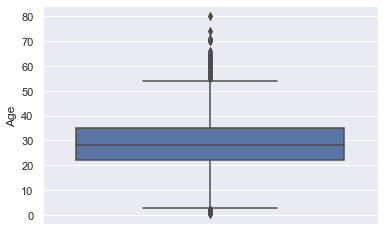

In [289]:
sns.boxplot(y=df["Age"]) 
plt.show()

In [31]:
df['Age'].describe()[['mean','50%']]

mean    29.699118
50%     29.699118
Name: Age, dtype: float64

## We have outliers. So, I prefer to replace missing values by the median that is not affected by outliers. It is also notable that from command describe can be seen that mean and median are almost the same. This is probably because of being normally distributed( can be seen from boxplot)

In [205]:
df["Age"].fillna(value=df["Age"].median(),inplace=True)

# Determine if the survival rate is associated to the class of passenger?

In [112]:
df['Pclass'].count()

891

In [114]:
df.groupby('Pclass').count()['Survived']

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [53]:
df.groupby('Pclass')['Survived'].value_counts() #table of frequency

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

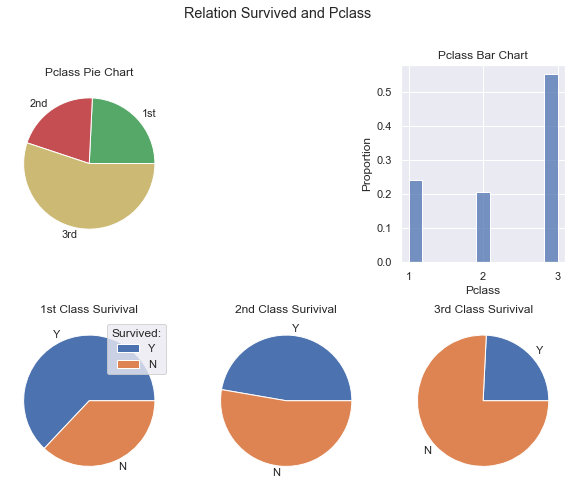

In [270]:
plt.figure(figsize = (10,8))
plt.subplot(2,3,1)
a=np.array([216/891,184/891,491/891])
plt.pie(a,labels=['1st','2nd','3rd'] ,colors=['g','r','y'])
plt.title("Pclass Pie Chart")

plt.subplot(2,3,3)
sns.histplot(x="Pclass", data=df, stat="proportion",multiple='stack')
plt.title("Pclass Bar Chart")

plt.subplot(2,3,4)
b=np.array([136/216,80/216])
plt.pie(b,labels=['Y','N'])
plt.legend(title='Survived:')
plt.title("1st Class Surivival")

plt.subplot(2,3,5)
c=np.array([87/184,97/184])
plt.pie(c,labels=['Y','N'])
plt.title("2nd Class Surivival")

plt.subplot(2,3,6)
d=np.array([119/491,372/491])
plt.pie(d, labels=['Y','N'])
plt.title("3rd Class Surivival")
            
plt.suptitle("Relation Survived and Pclass")
plt.show()

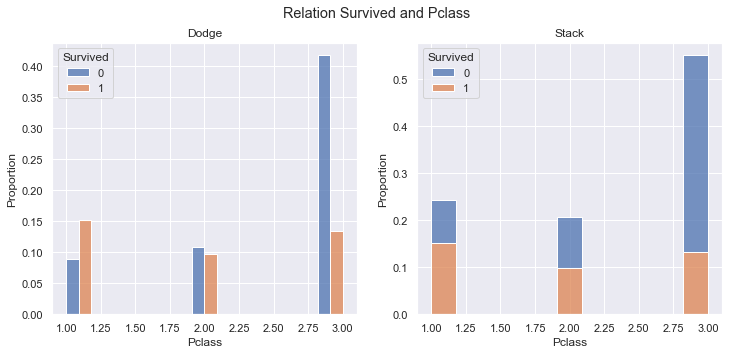

In [278]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(x="Pclass", hue="Survived", data=df, stat="proportion", multiple="dodge")
plt.title("Dodge")

plt.subplot(1,2,2)
sns.histplot(x="Pclass", hue="Survived", data=df, stat="proportion",multiple='stack')
plt.title("Stack")
            
plt.suptitle("Relation Survived and Pclass")
plt.show()

## From the barcharts and above pie charts can be inferred that while a signifacnt share of less-affluent passengers were dead, most of the rich people survived.

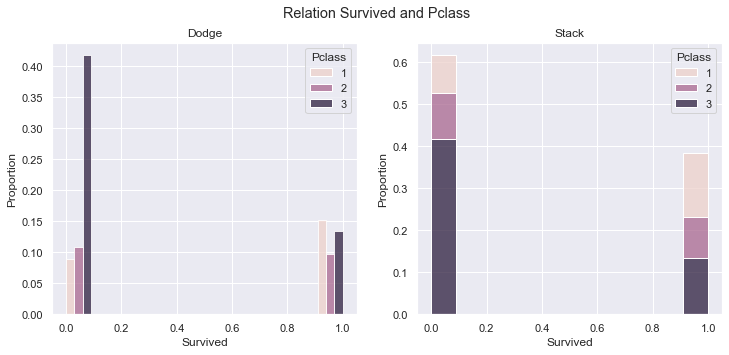

In [279]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(x="Survived", hue="Pclass", data=df, stat="proportion", multiple="dodge")
plt.title("Dodge")

plt.subplot(1,2,2)
sns.histplot(x="Survived", hue="Pclass", data=df, stat="proportion",multiple='stack')
plt.title("Stack")
            
plt.suptitle("Relation Survived and Pclass")
plt.show()

## The largest proportion of dead people belongs to 3rd class, and most of the survivers are from 1st class.

## **Conclusion:** Survival rate is strongly associated with the passenger class.

# Determine if the survival rate is associated to the gender?

In [193]:
print(df.groupby('Sex')['Survived'].count(),2*'\n',
      'total=',df.groupby('Sex')['Survived'].count().sum(),2*'\n',
      df.groupby('Sex')['Survived'].value_counts()) #table of frequency

Sex
female    314
male      577
Name: Survived, dtype: int64 

 total= 891 

 Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64


In [187]:
print(df.groupby('Sex')['Survived'].value_counts(sort=False,normalize=True))
z=df.groupby('Sex')['Survived'].value_counts(sort=False,normalize=True).tolist()

Sex     Survived
female  0           0.257962
        1           0.742038
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64


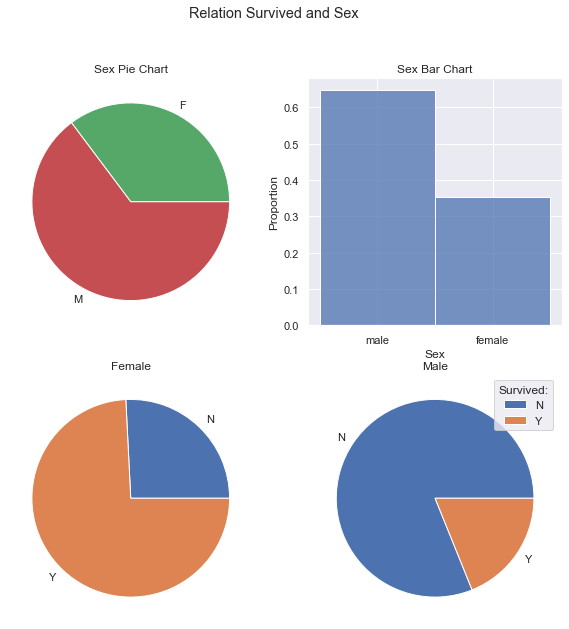

In [249]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
a=np.array([314/891,577/891])
plt.pie(a, labels=['F','M'] ,colors=['g','r'])
plt.title("Sex Pie Chart")

plt.subplot(2,2,2)
sns.histplot(x="Sex", data=df, stat="proportion",multiple='stack')
plt.title("Sex Bar Chart")

plt.subplot(2,2,3)
b=np.array([z[0],z[1]])
plt.pie(b,labels=['N','Y'])
plt.title("Female")

plt.subplot(2,2,4)
d=np.array([z[2],z[3]])
plt.pie(d, labels=['N','Y'])
plt.legend(title='Survived:')
plt.title("Male")
            
plt.suptitle("Relation Survived and Sex")
plt.show()

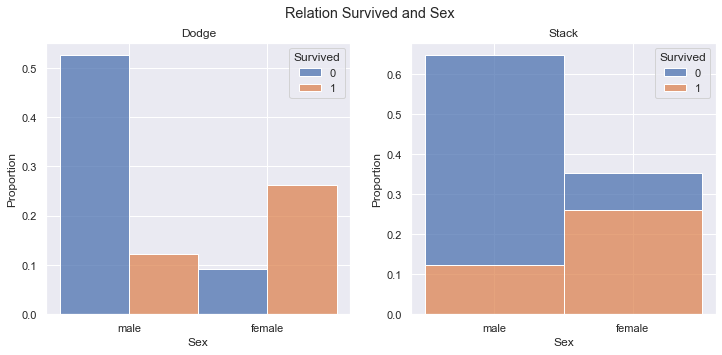

In [281]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(x="Sex", hue="Survived", data=df, stat="proportion", multiple="dodge")
plt.title("Dodge")

plt.subplot(1,2,2)
sns.histplot(x="Sex", hue="Survived", data=df, stat="proportion",multiple='stack')
plt.title("Stack")
            
plt.suptitle("Relation Survived and Sex")
plt.show()

## It can be easily seen that women were the priority of evacuation.

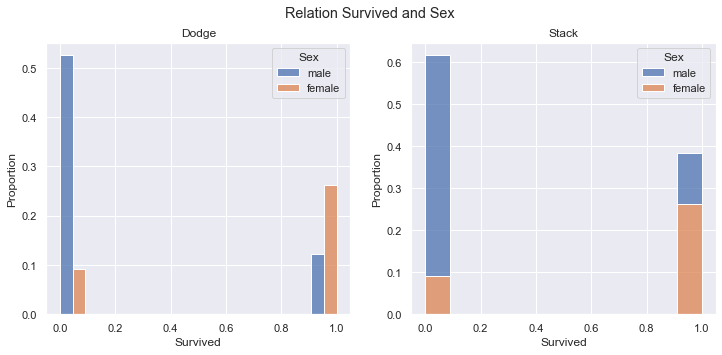

In [282]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(x="Survived", hue="Sex", data=df, stat="proportion", multiple="dodge")
plt.title("Dodge")

plt.subplot(1,2,2)
sns.histplot(x="Survived", hue="Sex", data=df, stat="proportion",multiple='stack')
plt.title("Stack")
            
plt.suptitle("Relation Survived and Sex")
plt.show()

# **Conclusion:** Survival is strongly associated with Age.

# Determine the survival rate is associated to the age?

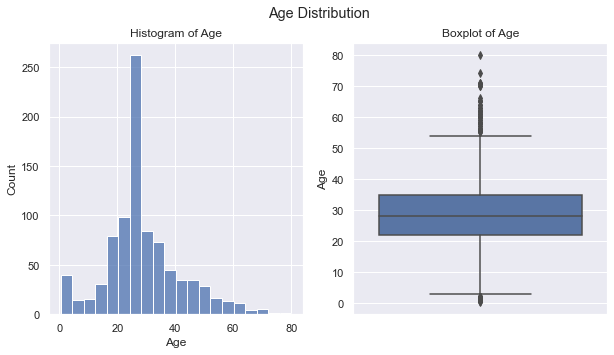

In [246]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.histplot(df["Age"], bins=20)
plt.title("Histogram of Age")

plt.subplot(1,2,2)
sns.boxplot(y=df["Age"])
plt.title("Boxplot of Age")

plt.suptitle("Age Distribution")
plt.show()

## It can be seen that apart from outliers, Age is nearly normally distributed. However, I prefet to use median instead of mean due to outliers.

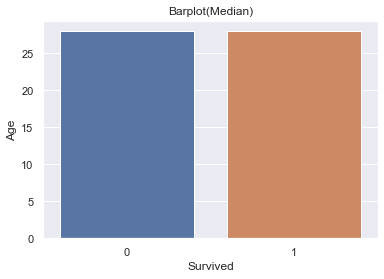

In [286]:
sns.barplot(x=df['Survived'],y=df['Age'], estimator= np.median)
plt.title('Barplot(Median)')
plt.show()

## There is no much difference between the medians.

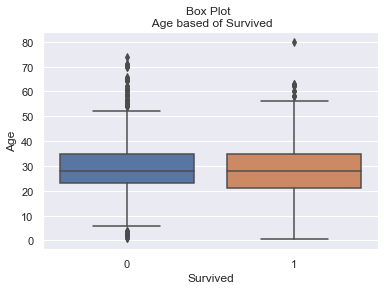

In [287]:
sns.boxplot(x=df['Survived'],y=df["Age"])
plt.title('Box Plot \n Age based of Survived')
plt.show()

## from the box plots, the distribution of survived ones is more dispersed (wider-because of IQR and even Range). However, Age seems not to be associated with the Survival rate, because the medians are close and are inside the box of the other one.

# **Conclusion:**Survived variable is not associated to the Age